In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Importing PCA and TSNE for data analysis
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Importing clustering and unsupervised learning algorithms like k-means, k-medoids, DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Silhouette score
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")


In [133]:
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [135]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [136]:
df[df.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


## Observations
- We have 167 countries.
- There are no null values, the data is clean.
- Except for Country Name every parameter is numeric.
- No duplicated values.

child_mort
Skew : 1.45


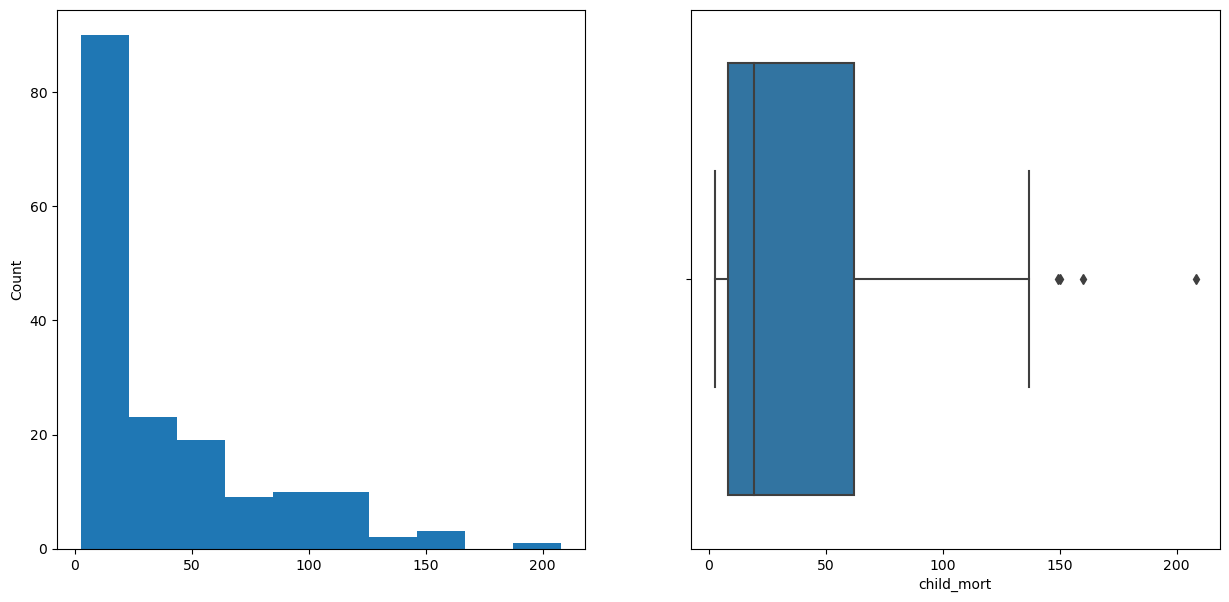

exports
Skew : 2.45


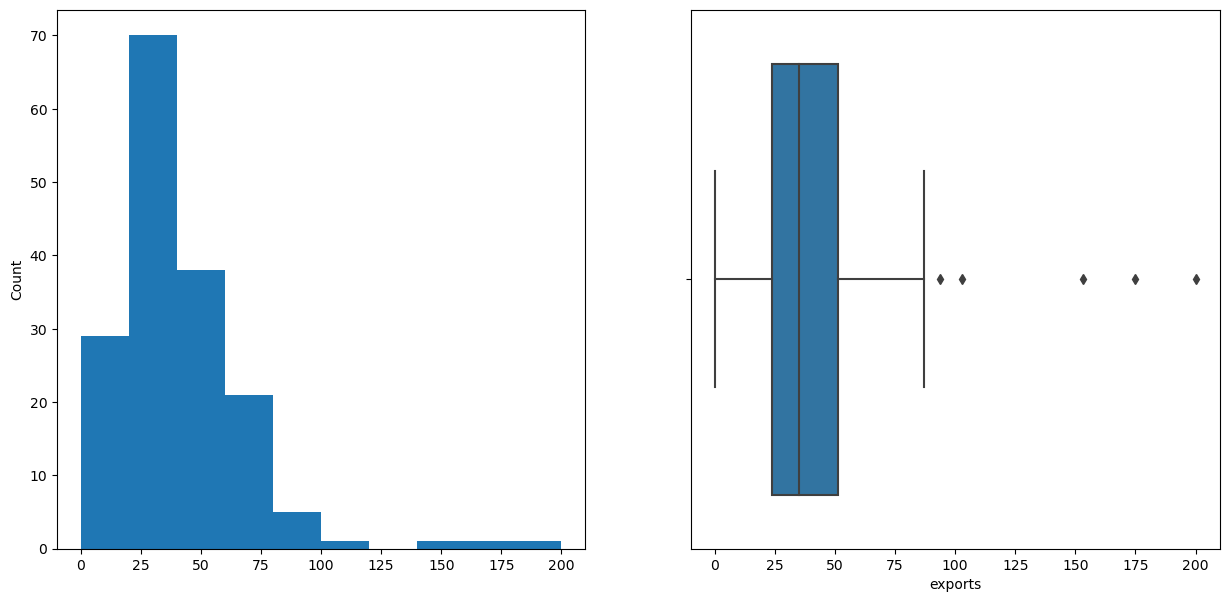

health
Skew : 0.71


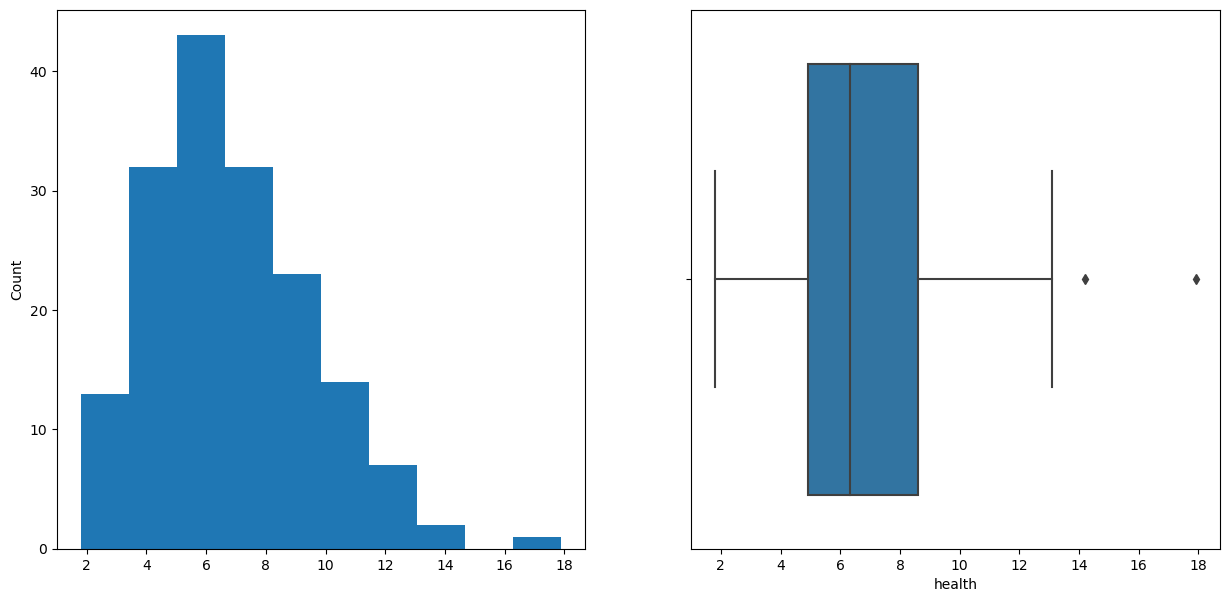

imports
Skew : 1.91


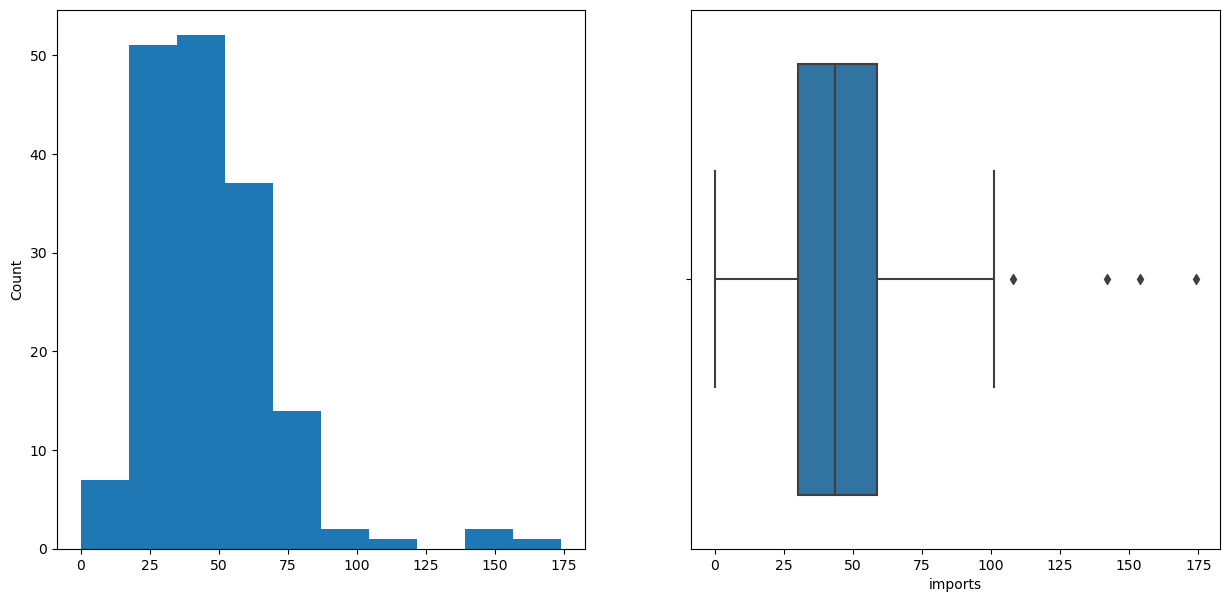

income
Skew : 2.23


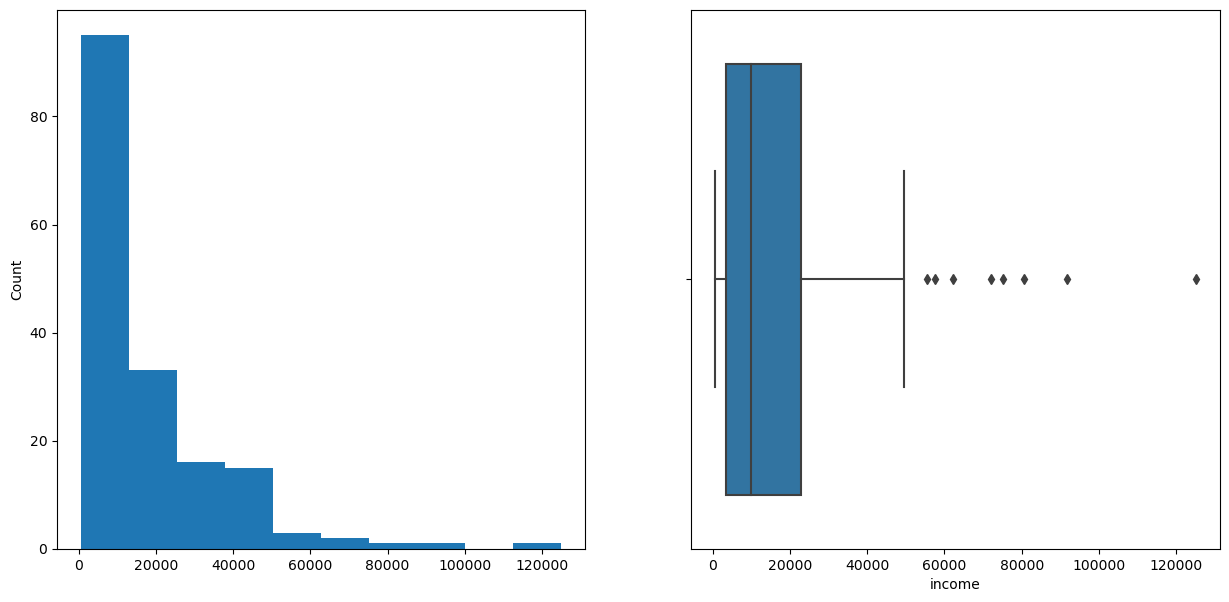

inflation
Skew : 5.15


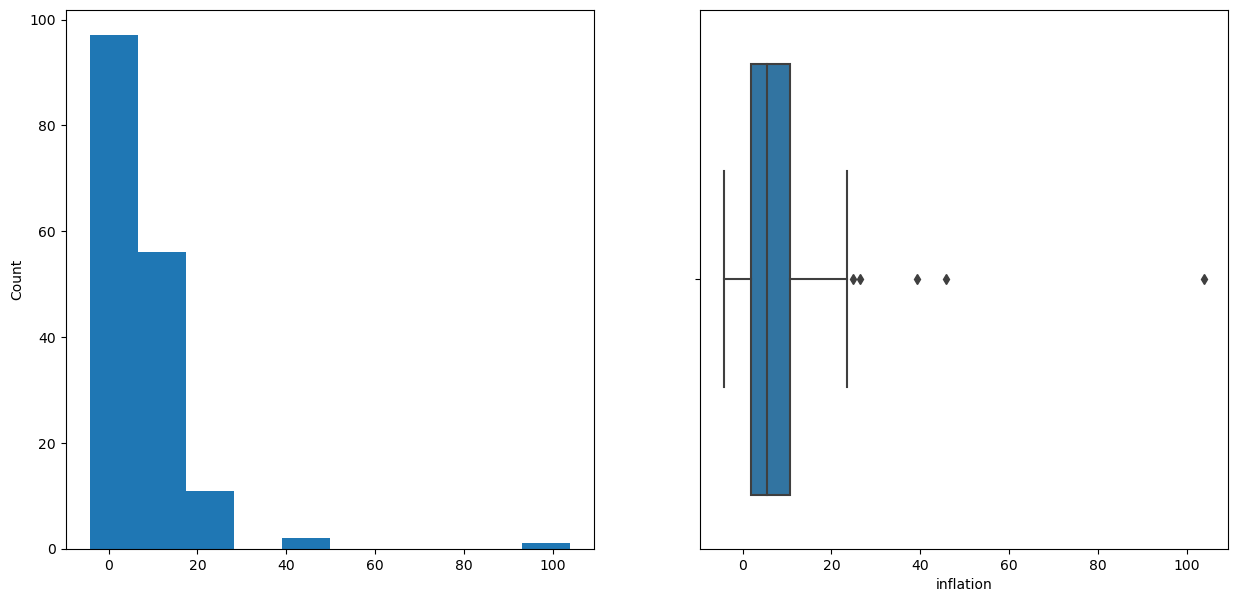

life_expec
Skew : -0.97


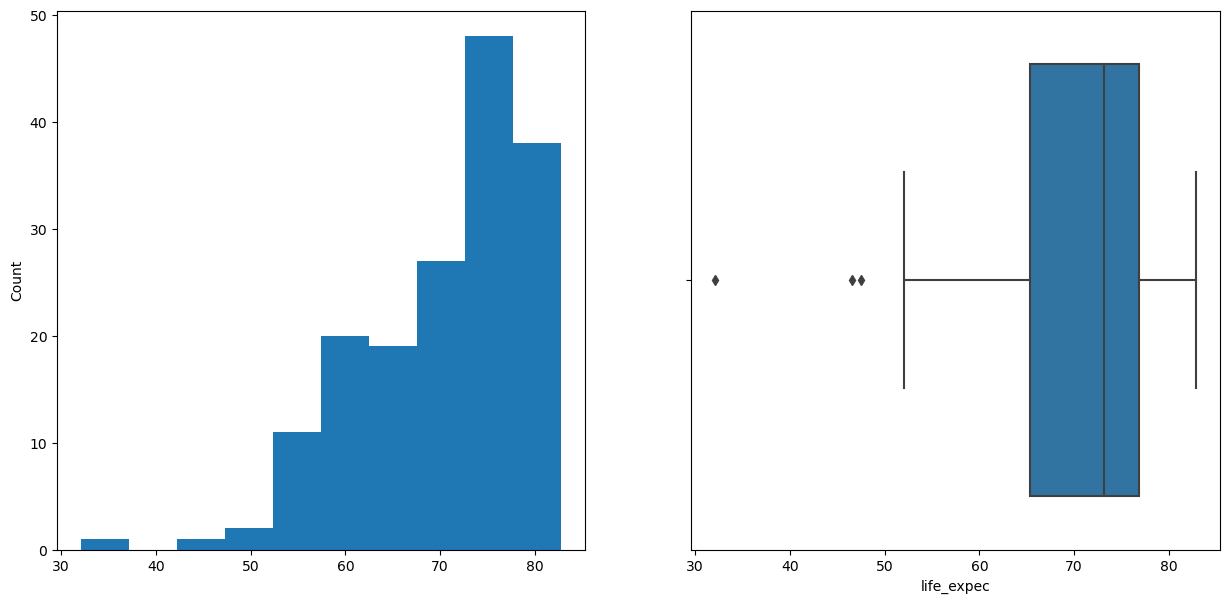

total_fer
Skew : 0.97


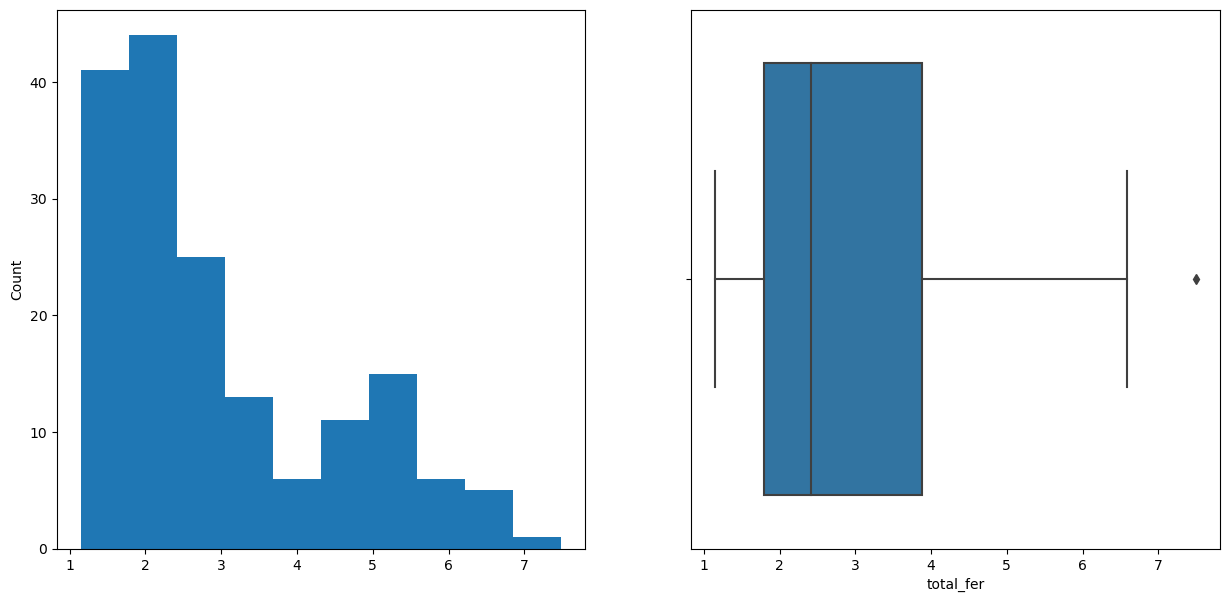

gdpp
Skew : 2.22


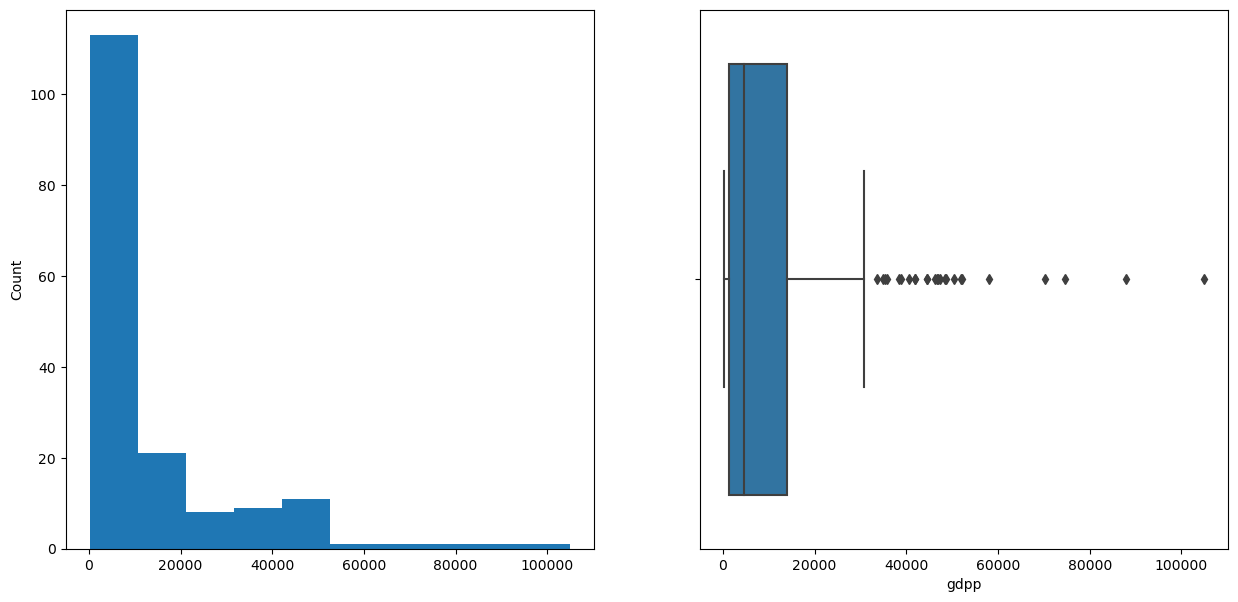

In [137]:
# Taking all columns expect the country name. (it does not make sense, Does it?)
for col in df.columns[1:]:
    print(col)
    print("Skew :", round(df[col].skew(), 2))
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 2, 1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel("Count")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## Observations:
- As observed previously most of the data is skewed.
- The only variable which is left skewed is life expectancy, which signifies most countries have addressed this issue.
- Most have outliers in right.

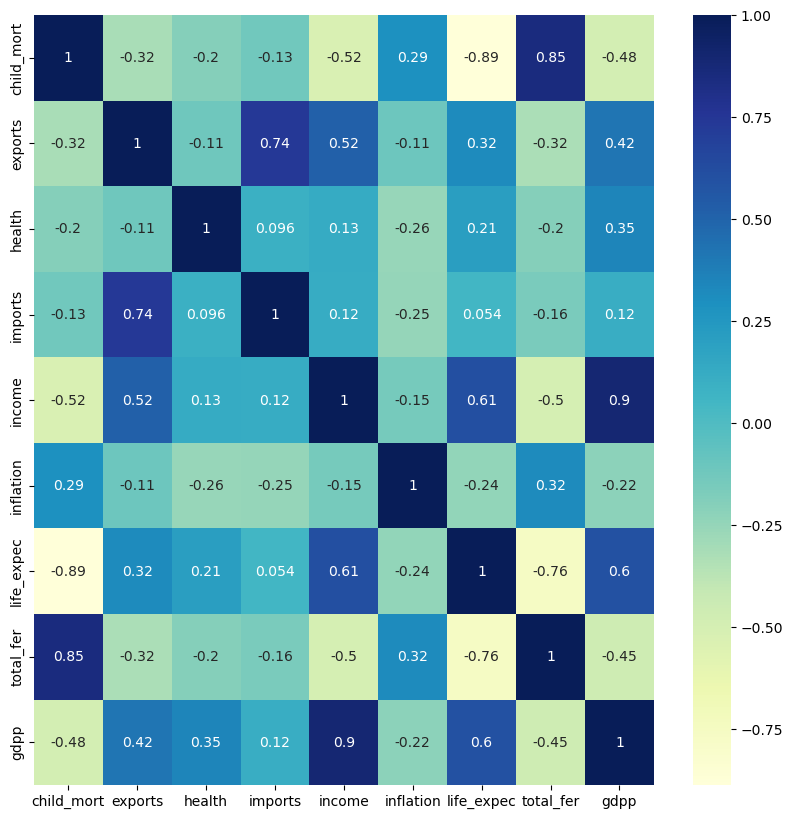

In [138]:
data_without_country = df.drop(columns=["country"])
plt.figure(figsize=(10, 10))
sns.heatmap(data_without_country.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Observations:
- **High Positive** correlation between variables:
    - child_mort and total_fer
    - exports and imports
    - gdpp and income
- **High Negative** correlation between variables:
    - child_mort and life_expec
    - total_fer and life_expec
- Other **Positive** Correlations
    - exports and income 
    - exports and gdpp
    - health and gdpp - Richer nations have better health spend.
    - income and life_expec - with better income life_expectancy of the child increases.
    - life_expec and gdpp - Rich nations have better child life expectancy.
- Other **Negative** Correlations
    - child_mort and income - with decrease in income (poor nations) child mortality is high.
    - child_mort and gdpp - Poorer nations have higher child mortality.
    - exports and child_mort - Nations where exports are high have high income and less child mortality.
    - inflation and health - Nations where inflation is high (economically affected countries) health spend is less.
    - income and total_fer
    - life_expec and inflation - Countries which have taken measures to economically counter inflation have better life expectency for children.
    - total_fer and gdpp

In [139]:
data_for_clustering = data_without_country.drop(columns=["gdpp"])

# Scaling the data and storing it in a new dataframe
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_for_clustering), columns=data_for_clustering.columns)
data_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946


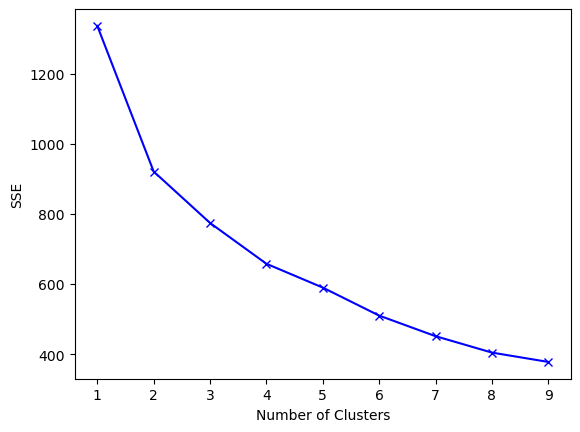

In [140]:
#Empty dictionary to store the SSE (sum of Squares errors) for each value of k
sse = {} 

# iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# Plotting the findings
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), "bx-")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

## Observations
- After 2 to 9 we do not see any elbow, its a consistant dip.



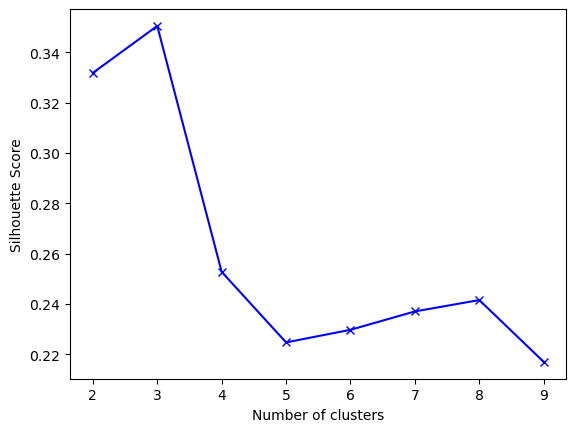

In [141]:
# Silhoutte score dict
sc = {}

# iterating over a range of ks fitting it to k-means and getting the silhoute score for each.
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_scaled)
    labels = kmeans.predict(data_scaled)
    sc[k] = silhouette_score(data_scaled, labels)

# Lets plot the finding - Maybe we will find an elbow
plt.figure()
plt.plot(list(sc.keys()), list(sc.values()), "bx-")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

## Observations:
- Silhouette score is highest for k = 3. Lets go with 3 clusters.

In [142]:

data_scaled_copy = data_scaled.copy()

# Perform K-means clustering on 'data_scaled'
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_scaled)

# Add predicted labels to 'data_scaled_copy'
data_scaled_copy["kmean_labels"] = kmeans.predict(data_scaled)

In [143]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

# Adding predicted Labels to scaled data and original data
data_scaled_copy["kmean_labels"] = kmeans.predict(data_scaled)
data_without_country["kmean_labels"] = kmeans.predict(data_scaled)

data_without_country["kmean_labels"].value_counts()

0    112
1     52
2      3
Name: kmean_labels, dtype: int64

In [144]:

# Lets get mean and median for each variable in the dataset
mean = data_without_country.groupby("kmean_labels").mean()
median = data_without_country.groupby("kmean_labels").median()

# Creating dataframe with means and medians 
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ["Group0_mean", "Group1_mean", "Group2_mean", "Group0_median", "Group1_median", "Group2_median"]
df_kmeans.T

,Group0_mean,Group1_mean,Group2_mean,Group0_median,Group1_median,Group2_median
child_mort,15.703571,88.844231,4.133333,12.450,85.65,2.80
exports,43.487500,28.203827,176.000000,39.600,23.30,175.00
health,7.069464,6.270385,6.793333,6.790,5.48,7.77
imports,46.143750,42.164729,156.666667,44.900,39.75,154.00
income,22069.285714,3832.750000,64033.333333,16250.000,1960.00,72100.00
inflation,6.042920,11.833750,2.468000,3.810,8.95,3.62
life_expec,75.215179,59.892308,81.433333,75.800,60.45,81.30
total_fer,2.119821,4.822115,1.380000,1.995,5.00,1.36
gdpp,16937.535714,1832.884615,57566.666667,8580.000,932.00,46600.00


## Insights:
- Group0 has high income, high exports, low child mortality, and high GDP per capita, These are definitely Rich and developed countries.
- Group 1 has high child mortality, low income, low life expectancy, a good amount of health expenditure, high inflation. This group contains our focus group of countries which need HELP foundations services. There are around 9 countries which need the services.
- Group 2 has only 3 countries.



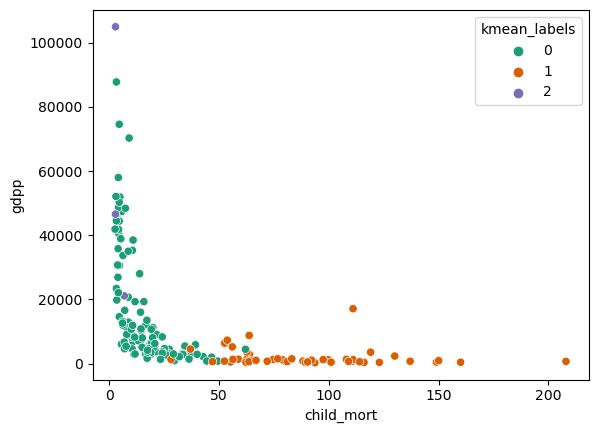

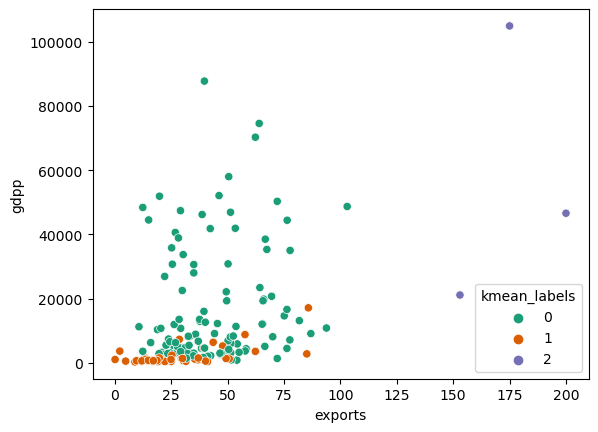

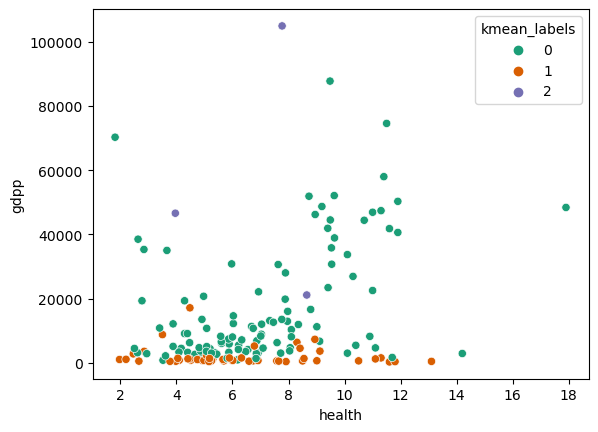

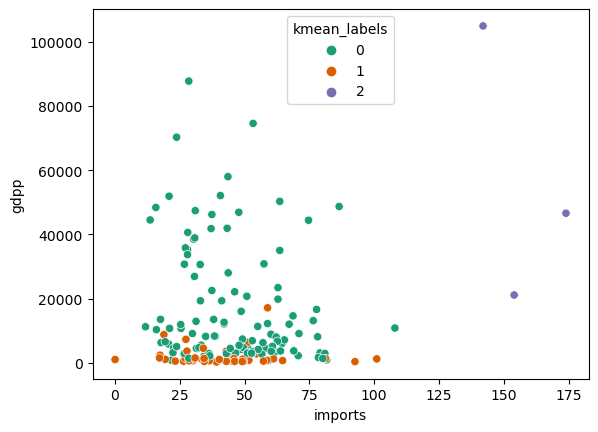

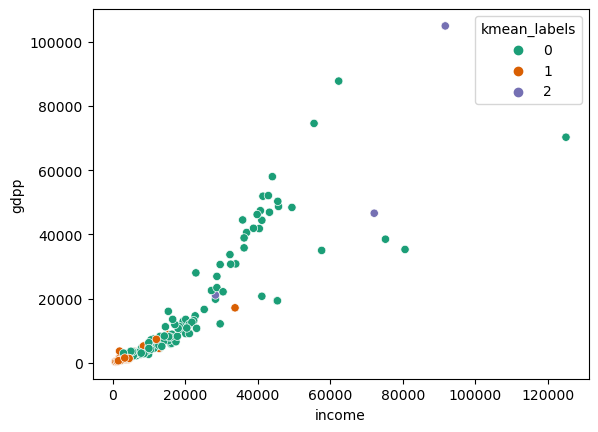

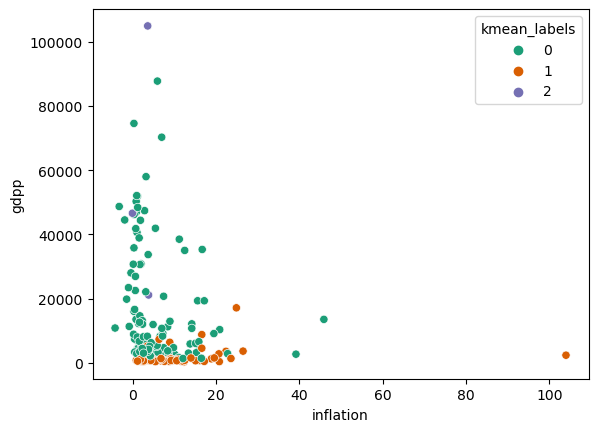

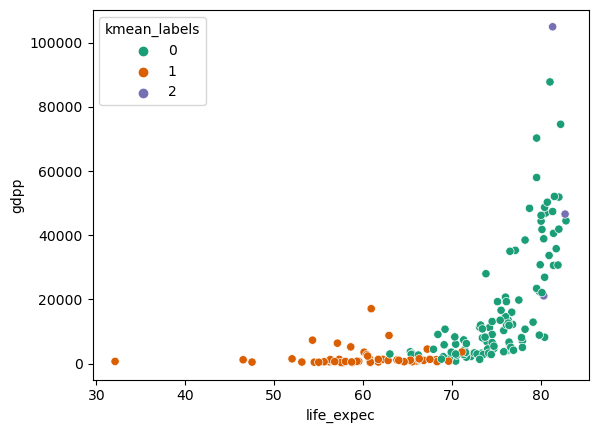

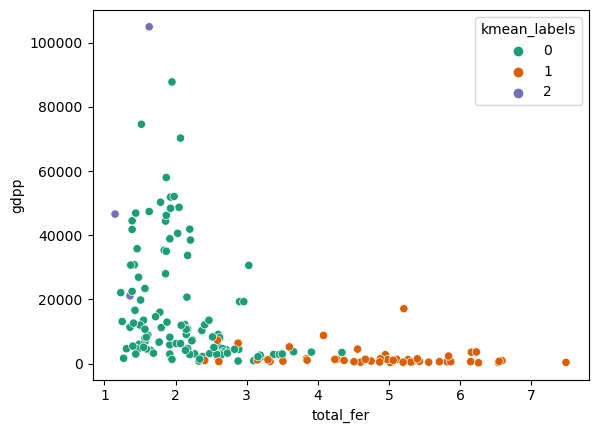

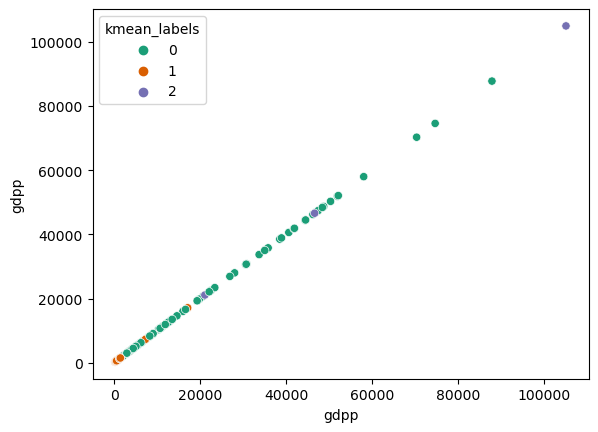

In [145]:
view_cols = []
for col in data_without_country.columns:
    if col != "kmean_labels":
        view_cols.append(col)
for col in view_cols:
    sns.boxplot(x="kmean_labels", y=col, data=data_without_country)
    plt.close()
    
for col in view_cols:
    sns.scatterplot(x=col, y="gdpp", data=data_without_country, hue="kmean_labels", palette="Dark2")
    plt.show()

## Observations:
- As fertility increases the population of the country increase which results in lower GDP and net income per person.
- Child mortality also negatively impacts the GDP of the country. High child mortality can be due to several reasons like higher population of the country, poverty or lower net income per person, lack of health facilities, etc.

In [146]:
df["kmean_labels"] = kmeans.predict(data_scaled)

print("Countries to concentrate on using K Medoids")
df[df["kmean_labels"] == 1]

Countries to concentrate on using K Medoids


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1


In [147]:
#Install this package to use KMedoids
! pip install scikit-learn-extra

In [148]:
from sklearn_extra.cluster import KMedoids

kmedo = KMedoids(n_clusters=3, random_state=1)
kmedo.fit(data_scaled)
data_scaled_copy["kmedoid_labels"] = kmedo.predict(data_scaled)
data_without_country["kmedoid_labels"] = kmedo.predict(data_scaled)

data_without_country["kmedoid_labels"].value_counts()

1    75
2    58
0    34
Name: kmedoid_labels, dtype: int64

In [149]:
mean = data_without_country.groupby("kmedoid_labels").mean()
median = data_without_country.groupby("kmedoid_labels").median()

df_kmedo = pd.concat([mean, median], axis=0)
df_kmedo.index = ["group_0_mean", "group_1_mean", "group_2_mean", "group_0_median", "group_1_median", "group_2_median"]
df_kmedo.T

,group_0_mean,group_1_mean,group_2_mean,group_0_median,group_1_median,group_2_median
child_mort,7.085294,17.853333,82.951724,4.700,15.70,79.600
exports,36.938235,52.989333,28.191362,31.600,48.30,23.800
health,9.413235,6.202133,6.086379,9.585,6.00,5.275
imports,33.452941,57.694667,40.795964,30.750,55.10,36.800
income,38094.705882,17592.800000,4284.189655,36550.000,13500.00,2145.000
inflation,4.020676,5.511573,12.922328,1.825,3.82,9.225
life_expec,79.614706,73.870667,60.958621,80.200,74.10,60.800
total_fer,1.842353,2.179600,4.589655,1.875,2.13,4.875
gdpp,35925.588235,10989.813333,2057.034483,38700.000,6230.00,994.000
kmean_labels,0.000000,0.080000,0.896552,0.000,0.00,1.000


## Observations:
- Group 0 is a cohort of rich countries, with high gdpp and income. health expenditure is quite significant, life expectancy is high and low fertility rate. 
- Group 2 is a cohort of poor countries with low life expectancy, high inflation, high total_fer and high child mortality.
- Group 1 is a cohort of developed and developing nations.

In [150]:
df["kmedoid_labels"] = kmedo.predict(data_scaled)

print("Countries to concentrate on using K Medoids")
df[df["kmedoid_labels"] == 2]


Countries to concentrate on using K Medoids


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_labels,kmedoid_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,2
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1,2
12,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,0,2
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1,2
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1,2
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1,2
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1,2
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1,2
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1,2
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1,2


In [151]:
df["kmean_labels"] = kmeans.predict(data_scaled)
print("Countries to concentrate on using k means")
df[df["kmean_labels"] == 1]

Countries to concentrate on using k means


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmean_labels,kmedoid_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,2
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530,1,2
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1,2
21,Botswana,52.5,43.600,8.30,51.3000,13300,8.920,57.1,2.88,6350,1,2
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1,2
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1,2
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1,2
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1,2
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1,2
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1,2


# Conclusion

Both K-Means and k-Medoids algorithms give a fair clustering for countries to focus on for HELP foundation.

> **Around 50 Countries are predicted that might need HELP Foundation's services**, 

